# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

dir_data = '../data/'


training_file = dir_data + 'train.p'
validation_file = dir_data + 'valid.p'
testing_file = dir_data + 'test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### 1.1 Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [2]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

import numpy as np

# TODO: Number of training examples
n_train = len(X_train)

# TODO: Number of validation examples
n_validation = len(X_valid)

# TODO: Number of testing examples.
n_test = len(X_test)

# TODO: What's the shape of an traffic sign image?
image_shape = X_train.shape[1:]

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(np.unique(y_train))

print("Number of training examples =", n_train)
print("Number of validation examples =", n_validation)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of validation examples = 4410
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### 1.2 Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

train set
Average number of examples per class: 809.28
Class with the most # of examples in the set: 2(Speed limit (50km/h)) - 2010 examples
Class with the least # of examples in the set: 37(Go straight or left) - 180 examples


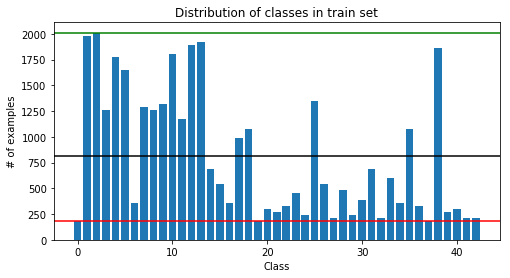

----------------------------------------
validation set
Average number of examples per class: 102.56
Class with the most # of examples in the set: 1(Speed limit (30km/h)) - 240 examples
Class with the least # of examples in the set: 41(End of no passing) - 30 examples


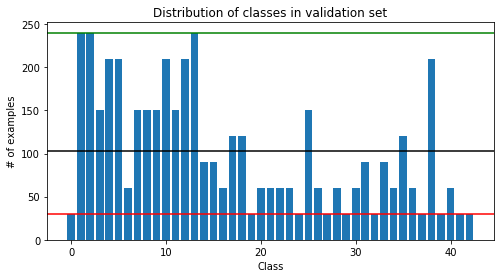

----------------------------------------
test set
Average number of examples per class: 293.72
Class with the most # of examples in the set: 2(Speed limit (50km/h)) - 750 examples
Class with the least # of examples in the set: 27(Pedestrians) - 60 examples


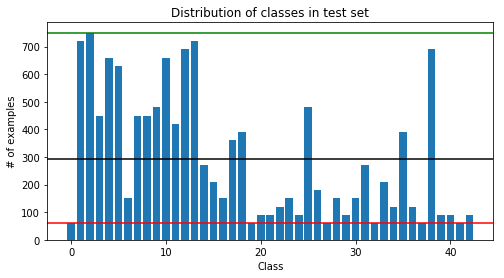

----------------------------------------


In [3]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
from collections import Counter
import pandas as pd
# Visualizations will be shown in the notebook.
%matplotlib inline

labels = {'train': y_train, 'validation': y_valid, 'test': y_test}
traffic_signs = pd.read_csv('signnames.csv',index_col='ClassId')

for y in labels.keys():

    print('{} set'.format(y))
    
    # Count the # of examples for each class in the set
    dist = dict(Counter(labels[y]))
    dist_keys = list(dist.keys())
    dist_values = list(dist.values())

    # Calculate some statistics of the distribution of classes
    mean_number = np.mean(dist_values)
    min_number = np.min(dist_values)
    min_class = dist_keys[np.argmin(dist_values)]
    max_number = np.max(dist_values)
    max_class = dist_keys[np.argmax(dist_values)]
    
    # Print these values
    print('Average number of examples per class: {:.2f}'.format(mean_number))
    print('Class with the most # of examples in the set: {}({}) - {} examples'.format(max_class,traffic_signs.SignName[max_class],max_number))
    print('Class with the least # of examples in the set: {}({}) - {} examples'.format(min_class,traffic_signs.SignName[min_class],min_number))
    
    # Plot the class distribution
    plt.figure(figsize=(8,4))
    plt.bar(dist_keys,dist_values)
    
    plt.axhline(mean_number,c='k')
    plt.axhline(min_number,c='r')
    plt.axhline(max_number,c='g')
    
    plt.title('Distribution of classes in {} set'.format(y))
    plt.xlabel('Class')
    plt.ylabel('# of examples')
    plt.show()
    print('----------------------------------------')

Train set


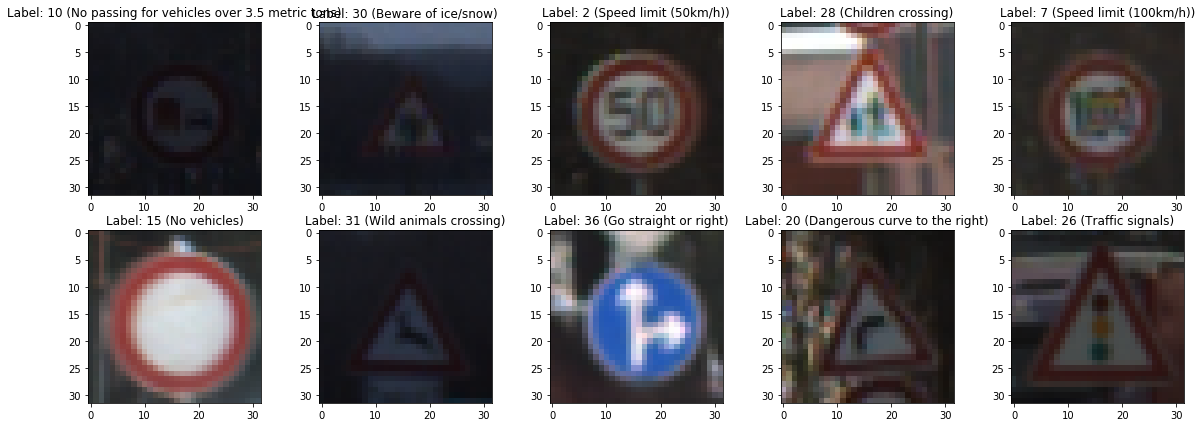


Test set


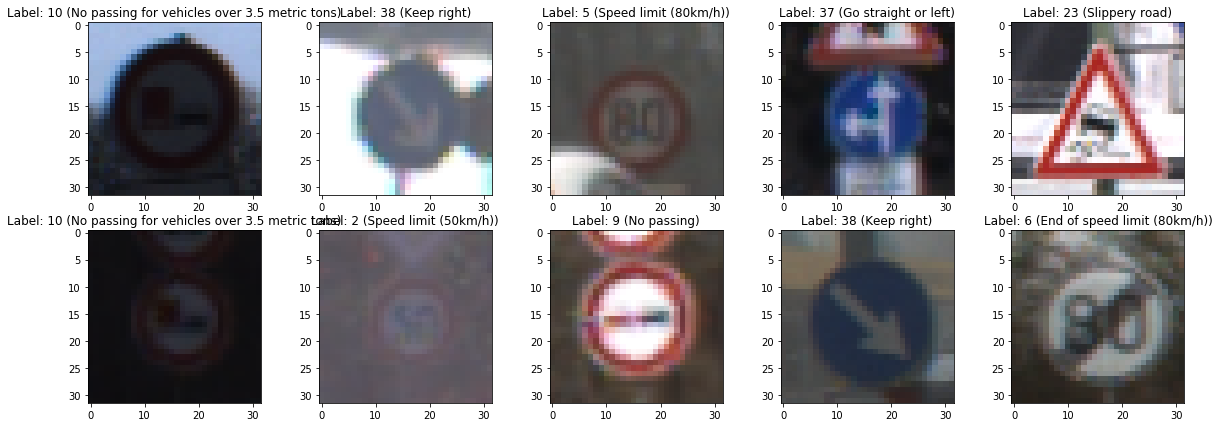


Validation set


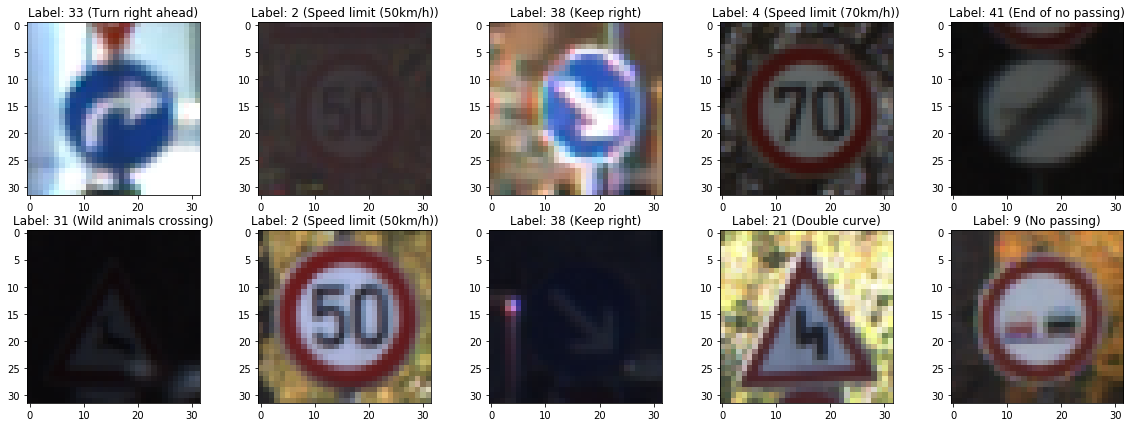

In [4]:
import random

# Function to display a random image in a given dataset (X,y), with its class
def plot_img_label(X, y,gray=False):
    fig, axes = plt.subplots(2, 5,figsize=(20,7))
    for ax in axes.ravel():
        index = random.randint(0, len(X))
        image = X[index]#.squeeze()

        cmap = 'gray' if gray else None
        ax.imshow(image, cmap=cmap)
        ax.set_title('Label: {} ({})'.format(y[index],traffic_signs.SignName[y[index]]))

    plt.show()

# Let's plot some of the images in the different sets
print('Train set')
plot_img_label(X_train,y_train)
print('\nTest set')
plot_img_label(X_test,y_test)
print('\nValidation set')
plot_img_label(X_valid,y_valid)


----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### 2.1 Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

### 2.1.1 Augment data

Here, I perform 3 transformations (rotation, add noise and horizontal flip) in order to add images for the most under represented classes.


In [5]:
# Code taken from 
# https://medium.com/@thimblot/data-augmentation-boost-your-image-dataset-with-few-lines-of-python-155c2dc1baec


from scipy import ndarray
import skimage as sk
from skimage import transform
from skimage import util

def random_rotation(image_array: ndarray):
    # pick a random degree of rotation between 25% on the left and 25% on the right
    random_degree = random.uniform(-25, 25)
    return np.uint8(sk.transform.rotate(image_array, random_degree) * 255)

def random_noise(image_array: ndarray):
    # add random noise to the image
    return  np.uint8(sk.util.random_noise(image_array) * 255)

def horizontal_flip(image_array: ndarray):
    # horizontal flip doesn't need skimage, it's easy as flipping the image array of pixels !
    return image_array[:, ::-1]



Text(0.5,1,'Flipped Image')

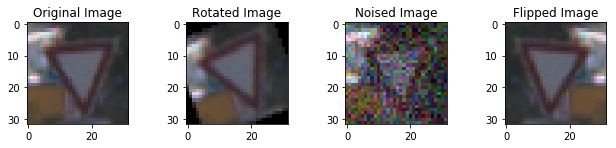

In [6]:
index = random.randint(0, len(X_train))
image = X_train[index]#.squeeze()

# variations
rotated_img = random_rotation(image)
noised_img = random_noise(image)
fliped_img = horizontal_flip(image)

f, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(9, 2))
f.tight_layout()
ax1.imshow(image)
ax1.set_title('Original Image')
ax2.imshow(rotated_img)
ax2.set_title('Rotated Image')
ax3.imshow(noised_img)
ax3.set_title('Noised Image')
ax4.imshow(fliped_img)
ax4.set_title('Flipped Image')

# plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

In [7]:
# List of traffic signs that are horizontaly symetrical. Thse signs can be flipped without "confussing" 
# the model at the training process

horizontaly_symetrical = [9, 11, 12, 13, 15, 17, 18, 22, 26, 30, 35]
traffic_signs.SignName[horizontaly_symetrical]

ClassId
9                                No passing
11    Right-of-way at the next intersection
12                            Priority road
13                                    Yield
15                              No vehicles
17                                 No entry
18                          General caution
22                               Bumpy road
26                          Traffic signals
30                       Beware of ice/snow
35                               Ahead only
Name: SignName, dtype: object

In [8]:
which = lambda lst:list(np.where(lst)[0]) #Taken from https://stackoverflow.com/questions/12207014/python-equivalent-of-which-in-r

# Function to augment images for a class that has less images than the expected value (average value)

def augment_data(X,y,label,mean_number):
    # Select just the data that belongs to this class
    X_class = np.copy(X)
    X_class = X_class[np.where(y == label)]

    # If the traffic sign is symetrical, the "horizontal_flip" transform can be used
    n_variations = 3 if label in horizontaly_symetrical else 2

    # Number of "new" images to create. It is set to be maximum the same number of existing images
    new_images = int((np.min([mean_number/ len(X_class), 2.0]) - 1) * len(X_class))
    new_X = np.zeros((new_images,) + X_class.shape[1:])

    # Create "new" images
    for i in range(new_images):
        # Pick random image from that class
        index = random.randint(0, len(X_class)-1)
        image = X_class[index]

        # Pick random variation
        variation = random.randint(1, n_variations*3)

        if variation <= 5:
            new_X[i] = random_rotation(image)
        elif variation <= 6:
            new_X[i] = random_noise(image)
        else:
            new_X[i] = horizontal_flip(image)

    # Concatenate the array with the "new" images to the original'X' array
    new_X = np.uint8(new_X)
    X_out = np.concatenate((X, new_X),axis=0)
    
    # Create and concatenate a new labels array to the original 'y' array
    new_y = np.int16(np.ones(new_images)* label)
    y_out = np.concatenate((y, new_y), axis = None)

    # Return augmented arrays
    return X_out, y_out



In [9]:
# Augment data at train set

dist = dict(Counter(y_train))
dist_keys = list(dist.keys())
dist_values = list(dist.values())

# Calculate expected number of images per class
mean_number = np.mean(dist_values)

# Labels that are under-represented in the set
labels_to_augment = [dist_keys[i] for i in which(dist_values < mean_number)]

for label in labels_to_augment:
    X_train, y_train = augment_data(X_train,y_train,label,mean_number)
    
print('Previous number of train examples: {}. New number of train examples: {}'.format(n_train, len(X_train)))
    

Previous number of train examples: 34799. New number of train examples: 41603


In [10]:
# Take copies of the data sets, just in case

X_train_orig = np.copy(X_train)
X_test_orig = np.copy(X_test)
X_valid_orig = np.copy(X_valid)

y_train_orig = np.copy(y_train)
y_test_orig = np.copy(y_test)
y_valid_orig = np.copy(y_valid)


### 2.1.2 Normalize data

Take the mean and standard deviation of each set (training, validation and test), to normalize them.


In [11]:
### Preprocess the data here. It is required to normalize the data. Other preprocessing steps could include 
### converting to grayscale, etc.
### Feel free to use as many code cells as needed.

def normalize(X):
    X = X.astype(float)
    mean_x = np.mean(X)
    std_x = np.std(X)
    
    for i in range(X.shape[0]):
        if len(X.shape) > 3:
            for j in range(X.shape[3]):
                X[i,:,:,j] = (X[i,:,:,j] - mean_x) / std_x
        else:
            X[i,:,:] = (X[i,:,:] - mean_x) / std_x
            
    return X

# Normalize the 3 sets

X_train = normalize(X_train)
X_test = normalize(X_test)
X_valid = normalize(X_valid)


### 2.1.3 Convert to grayscale

One option is to train the model with only grayscale images.

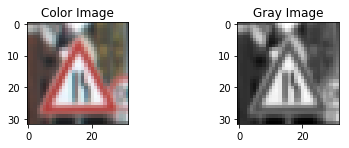

In [12]:
# Convert to grayscale
import cv2

def to_grayscale(X):
    out = np.zeros(X.shape[0:3])
    for i in range(X.shape[0]):
        out[i] = cv2.cvtColor(X[i], cv2.COLOR_RGB2GRAY) 
        
    return out

# Convert the 3 sets to gray scale
X_train_gray = to_grayscale(X_train_orig)
X_test_gray = to_grayscale(X_test_orig)
X_valid_gray = to_grayscale(X_valid_orig)

# Plot a random image and its correspondent gray version
index = random.randint(0, len(X_train))
image = X_train_orig[index]
image_gray = X_train_gray[index]

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(6, 2))
f.tight_layout()
ax1.imshow(image)
ax1.set_title('Color Image')
ax2.imshow(image_gray, cmap='gray')
ax2.set_title('Gray Image')


# Normalize the grayscale sets

X_train_gray = normalize(X_train_gray)
X_test_gray = normalize(X_test_gray)
X_valid_gray = normalize(X_valid_gray)


### 2.2 Model Architecture

In [13]:
### Define your architecture here.
### Feel free to use as many code cells as needed.

import tensorflow as tf
from tensorflow.contrib.layers import flatten

EPOCHS = 45
BATCH_SIZE = 128
dataset = 'color'
dropout = 0.7  # Probability to mantain conections at dropout



In [14]:
if dataset == 'color':
    in_depth = 3
    X_train_model = np.copy(X_train)
    X_valid_model = np.copy(X_valid)
    X_test_model = np.copy(X_test)
    
else:
    in_depth = 1
    X_train_model = np.copy(X_train_gray)[..., np.newaxis]
    X_valid_model = np.copy(X_valid_gray)[..., np.newaxis]
    X_test_model = np.copy(X_test_gray)[..., np.newaxis]
   

from sklearn.utils import shuffle
X_train_model, y_train = shuffle(X_train_model, y_train)


In [15]:
# Function to train a LeNet convnet. This almost the same as the code seen in the last lesson.
# Only differences are input and output dimensions, and the introduction of 2 dropout operations between 
# the fully conected layers

def LeNet(x):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    weights = {
        'wc1': tf.Variable(tf.truncated_normal([5,5,in_depth,6],mean=mu,stddev=sigma)),
        'wc2': tf.Variable(tf.truncated_normal([5,5,6,16],mean=mu,stddev=sigma)),
        'wd1': tf.Variable(tf.truncated_normal([400,120],mean=mu,stddev=sigma)),
        'wd2': tf.Variable(tf.truncated_normal([120,84],mean=mu,stddev=sigma)),
        'out': tf.Variable(tf.truncated_normal([84,n_classes],mean=mu,stddev=sigma)),
    }
    
    biases = {
        'bc1': tf.Variable(tf.random_normal([6],mean=mu,stddev=sigma)),
        'bc2': tf.Variable(tf.random_normal([16],mean=mu,stddev=sigma)),
        'bd1': tf.Variable(tf.random_normal([120],mean=mu,stddev=sigma)),
        'bd2': tf.Variable(tf.random_normal([84],mean=mu,stddev=sigma)),
        'out': tf.Variable(tf.random_normal([n_classes],mean=mu,stddev=sigma)),
    }
    
    # Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    layer_1 = tf.nn.conv2d(x, weights['wc1'], strides=[1,1,1,1], padding='VALID')
    layer_1 = tf.nn.bias_add(layer_1, biases['bc1'])
    # Activation.
    layer_1 = tf.nn.relu(layer_1)
    # Pooling. Input = 28x28x6. Output = 14x14x6.
    layer_1 = tf.nn.max_pool(layer_1, ksize=[1,2,2,1], strides=[1,2,2,1], padding='SAME')

    # Layer 2: Convolutional. Output = 10x10x16.
    layer_2 = tf.nn.conv2d(layer_1, weights['wc2'], strides=[1,1,1,1], padding='VALID')
    layer_2 = tf.nn.bias_add(layer_2, biases['bc2'])
    # Activation.
    layer_2 = tf.nn.relu(layer_2)
    # Pooling. Input = 10x10x16. Output = 5x5x16.
    layer_2 = tf.nn.max_pool(layer_2, ksize=[1,2,2,1], strides=[1,2,2,1], padding='SAME')
    # TODO: Flatten. Input = 5x5x16. Output = 400.
    layer_2 = flatten(layer_2)
    
    # Layer 3: Fully Connected. Input = 400. Output = 120.
    layer_3 = tf.add(tf.matmul(layer_2, weights['wd1']), biases['bd1'])
    # Activation.
    layer_3 = tf.nn.relu(layer_3)
    # Dropout
    layer_3 = tf.nn.dropout(layer_3, dropout)

    # Layer 4: Fully Connected. Input = 120. Output = 84.
    layer_4 = tf.add(tf.matmul(layer_3, weights['wd2']), biases['bd2'])
    # Activation.
    layer_4 = tf.nn.relu(layer_4)
    # Dropout
    layer_4 = tf.nn.dropout(layer_4, dropout)
    
    # Layer 5: Fully Connected. Input = 84. Output = 10.
    logits = tf.add(tf.matmul(layer_4, weights['out']), biases['out'])
    
    return logits



### 2.3 Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [16]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Feel free to use as many code cells as needed.

x = tf.placeholder(tf.float32, (None, 32, 32, in_depth))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, n_classes)

keep_prob = tf.placeholder(tf.float32)


In [17]:
rate = 0.0008

logits = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)



In [18]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data, dropout):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: dropout})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples


In [19]:
train_accs = []
valid_accs = []

train_loss = []
valid_loss = []

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train_model, y_train = shuffle(X_train_model, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train_model[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: dropout})
            
        train_accuracy = evaluate(X_train_model,y_train, 1.0)
        validation_accuracy = evaluate(X_valid_model, y_valid, 1.0)
        
        training_loss = sess.run(loss_operation,feed_dict={x: X_train_model, y: y_train, keep_prob: 1.0})
        validation_loss = sess.run(loss_operation,feed_dict={x: X_valid_model, y: y_valid, keep_prob: 1.0})
        
        train_accs.append(train_accuracy)
        valid_accs.append(validation_accuracy)
        
        train_loss.append(training_loss)
        valid_loss.append(validation_loss)
        
        print("EPOCH {} ...".format(i+1))
        print('Training Accuracy = {:.3f}  |  Validation Accuracy = {:.3f}'.format(train_accuracy,validation_accuracy))
        print('Training Loss = {:.3f}  |  Validation Loss = {:.3f}'.format(training_loss,validation_loss))
        print()
        
    saver.save(sess, './lenet')
    print("Model saved")



Training...

EPOCH 1 ...
Training Accuracy = 0.664  |  Validation Accuracy = 0.616
Training Loss = 1.078  |  Validation Loss = 1.228

EPOCH 2 ...
Training Accuracy = 0.809  |  Validation Accuracy = 0.759
Training Loss = 0.607  |  Validation Loss = 0.814

EPOCH 3 ...
Training Accuracy = 0.866  |  Validation Accuracy = 0.820
Training Loss = 0.424  |  Validation Loss = 0.592

EPOCH 4 ...
Training Accuracy = 0.898  |  Validation Accuracy = 0.847
Training Loss = 0.329  |  Validation Loss = 0.515

EPOCH 5 ...
Training Accuracy = 0.918  |  Validation Accuracy = 0.873
Training Loss = 0.267  |  Validation Loss = 0.476

EPOCH 6 ...
Training Accuracy = 0.929  |  Validation Accuracy = 0.876
Training Loss = 0.238  |  Validation Loss = 0.409

EPOCH 7 ...
Training Accuracy = 0.939  |  Validation Accuracy = 0.885
Training Loss = 0.197  |  Validation Loss = 0.390

EPOCH 8 ...
Training Accuracy = 0.947  |  Validation Accuracy = 0.892
Training Loss = 0.179  |  Validation Loss = 0.419

EPOCH 9 ...
Trainin

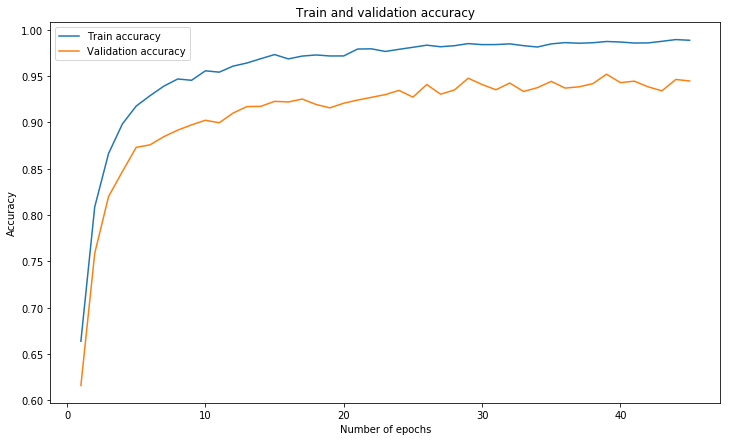

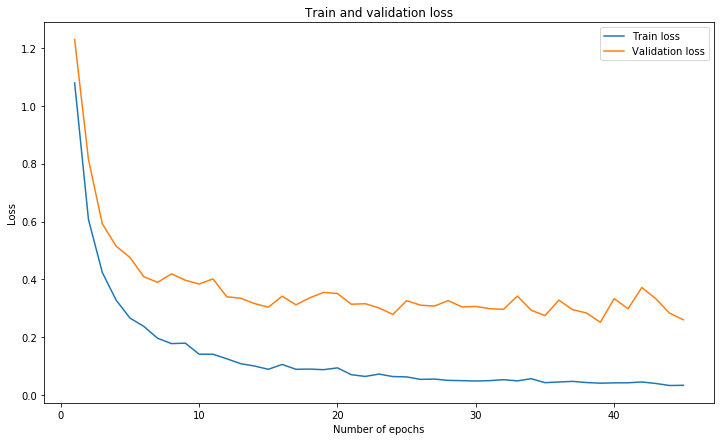

In [20]:
plt.figure(figsize=(12,7))
plt.plot(range(1,EPOCHS+1),train_accs, label='Train accuracy')
plt.plot(range(1,EPOCHS+1),valid_accs, label='Validation accuracy')
plt.legend()
plt.title('Train and validation accuracy')
plt.xlabel('Number of epochs')
plt.ylabel('Accuracy')
plt.show()

plt.figure(figsize=(12,7))
plt.plot(range(1,EPOCHS+1),train_loss, label='Train loss')
plt.plot(range(1,EPOCHS+1),valid_loss, label='Validation loss')
plt.legend()
plt.title('Train and validation loss')
plt.xlabel('Number of epochs')
plt.ylabel('Loss')
plt.show()

In [21]:
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.

with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(X_test, y_test, 1.0)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

INFO:tensorflow:Restoring parameters from ./lenet
Test Accuracy = 0.926


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### 3.1 Load and Output the Images

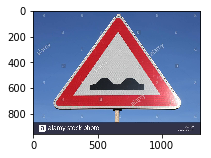

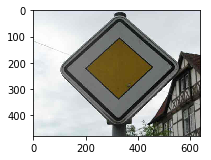

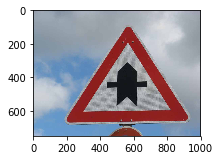

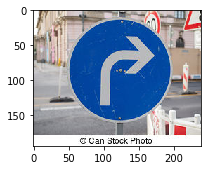

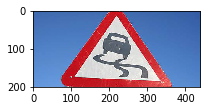

In [22]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.

from glob import glob

web_images = glob('new images/*.jpg')


web_X = np.uint8(np.zeros([5,32,32,3]))

for i,image in enumerate(web_images):
    # Read the image
    im = cv2.imread(image)
    im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
    
    # Plot the image
    plt.figure(figsize=(3,3))
    plt.imshow(im)
    plt.show()
    
    # Resize the image to 32 by 32 
    im = cv2.resize(im, (32, 32), interpolation = cv2.INTER_AREA)

    web_X[i] = np.uint8(im)



In [23]:
# Normalize the set
web_X_norm = normalize(web_X)


### 3.2 Predict the Sign Type for Each Image

INFO:tensorflow:Restoring parameters from ./lenet
Prediction = [30 12 11 33  1]


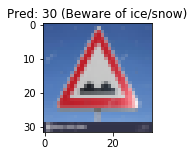

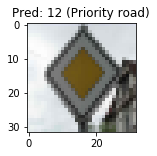

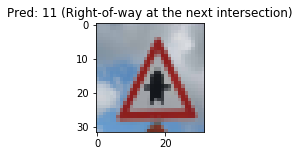

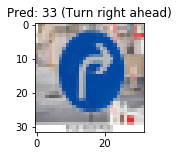

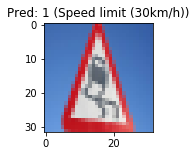

In [24]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.

prediction = tf.argmax(logits, 1)

with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    pred = sess.run(prediction, feed_dict={x:web_X_norm})
    print("Prediction = {}".format(pred))
    
for i in range(len(web_X)):
    plt.figure(figsize=(2,2))
    plt.imshow(web_X[i])
    plt.title('Pred: {} ({})'.format(pred[i], traffic_signs.SignName[pred[i]]))
    plt.show()


### Analyze Performance

The model is getting 3 images correct out of 5. This means an accuracy of 60%.

This low value is due to the fact that the images used here may have some variations that were not present at the training set. Also, 5 is a very low number of images to test the performance of the model property.


### 3.3 Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tf.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

INFO:tensorflow:Restoring parameters from ./lenet


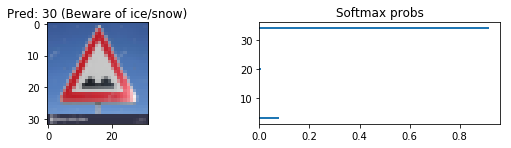

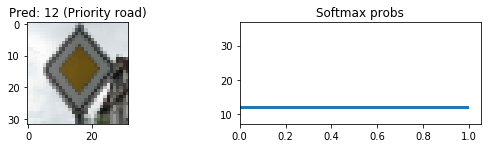

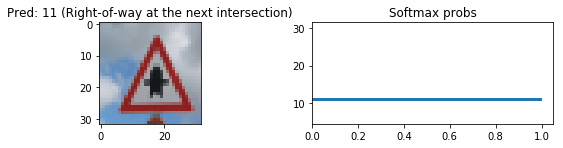

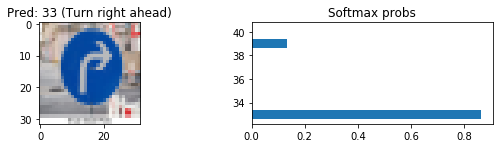

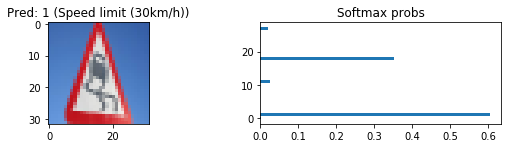

In [25]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.

top_5 = tf.nn.top_k(tf.nn.softmax(logits), k=5)

with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    top_5_logits = sess.run(top_5, feed_dict={x:web_X_norm})

for i in range(len(web_X)):
    probs = top_5_logits[0][i]
    probs = [np.round(i,3) for i in probs]
    
    classes = top_5_logits[1][i]
    
    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 2))
    f.tight_layout()
    ax1.imshow(web_X[i])
    ax1.set_title('Pred: {} ({})'.format(pred[i], traffic_signs.SignName[pred[i]]))
    ax2.barh(classes, probs)
    ax2.set_title('Softmax probs')
    plt.show()


In general, the model seems to be extremely certain about the predictions it makes, when these predictions are right. When the model gets the wrong prediction, it can be seen that its probabilities are not as high.

This may indicate that the magnitude of the weights is large. Regularization techniques can be used to fix this.


### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [26]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")